<a href="https://colab.research.google.com/github/Bessanje/Projeto_Unicornio/blob/main/Case_Study_UNIC%C3%93RNIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREPARANDO OS DADOS

In [ ]:
 # Frameworks
import pandas     as pd
import numpy      as np

# Gráficos
import matplotlib.pyplot    as plt
import seaborn    as sns

In [ ]:
# Ajustes CASAS DECIMAIS
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# CARREGAR A BASE DE DADOS
unicornio = pd.read_csv('UNICORNIO.csv')

In [ ]:
# INFORMAÇÕES SOBRE A BASE DE DADOS
unicornio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [ ]:
# PRIMEIROS REGISTROS
unicornio.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
# RENOMEANDO AS COLUNAS
unicornio.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [ ]:
unicornio.rename( columns={
   'Company': 'Empresa',
   'Valuation ($B)' : 'Valor($)',
   'Date Joined' : 'Data de Adesão',
   'Country' : 'País',
   'City' : 'Cidade',
   'Industry' : 'Setor',
   'Investors': 'Investidores',
   }, inplace=True)

In [ ]:
# Retirada do $
unicornio['Valor($)'] = unicornio['Valor($)'].apply(lambda x: x.replace('$','') )

In [ ]:
unicornio.head()

,Empresa,Valor($),Data de Adesão,País,City,Setor,Investidores
0,ByteDance,140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
# Conversão da coluna VALOR ($) para NÚMERO
unicornio['Valor($)'] = pd.to_numeric(unicornio['Valor($)']);

In [ ]:
# Conversão da coluna DATA DE ADESÃO para DATA
unicornio['Data de Adesão'] = pd.to_datetime(unicornio['Data de Adesão']);

In [ ]:
unicornio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Empresa         1186 non-null   object        
 1   Valor($)        1186 non-null   float64       
 2   Data de Adesão  1186 non-null   datetime64[ns]
 3   País            1186 non-null   object        
 4   City            1186 non-null   object        
 5   Setor           1186 non-null   object        
 6   Investidores    1168 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 65.0+ KB


In [ ]:
unicornio.head()

,Empresa,Valor($),Data de Adesão,País,City,Setor,Investidores
0,ByteDance,140.00,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,127.00,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.00,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.00,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,40.00,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
# CAMPOS NULOS
unicornio.isnull().sum()

Empresa            0
Valor($)           0
Data de Adesão     0
País               0
City               0
Setor              0
Investidores      18
dtype: int64

In [ ]:
unicornio['Data de Adesão'].dt.year

0       2017
1       2012
2       2018
3       2014
4       2018
        ... 
1181    2022
1182    2022
1183    2022
1184    2022
1185    2022
Name: Data de Adesão, Length: 1186, dtype: int32

In [ ]:
# Criando as colunas ANO e MÊS
unicornio['Ano'] = unicornio['Data de Adesão'].dt.year

In [ ]:
unicornio['Mes'] = unicornio['Data de Adesão'].dt.month

In [ ]:
unicornio.head()

,Empresa,Valor($),Data de Adesão,País,City,Setor,Investidores,Ano,Mes
0,ByteDance,140.00,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,4
1,SpaceX,127.00,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,12
2,SHEIN,100.00,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",2018,7
3,Stripe,95.00,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,1
4,Canva,40.00,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,1


In [ ]:
unicornio.describe( include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Empresa,1186,1183,Bolt,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valor($),"1,186.00",NaN,NaN,NaN,3.25,1.00,1.10,1.60,3.00,140.00,7.64
Data de Adesão,1186,NaN,NaN,NaN,2020-08-06 15:13:03.136593664,2007-07-02 00:00:00,2019-09-12 12:00:00,2021-05-09 12:00:00,2021-11-14 00:00:00,2022-08-24 00:00:00,NaN
País,1186,48,United States,636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1186,286,San Francisco,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Setor,1186,34,Fintech,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investidores,1168,1152,Sequoia Capital,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ano,"1,186.00",NaN,NaN,NaN,"2,020.12","2,007.00","2,019.00","2,021.00","2,021.00","2,022.00",1.98
Mes,"1,186.00",NaN,NaN,NaN,6.24,1.00,3.00,6.00,9.00,12.00,3.40


# ANÁLISE DESCRITIVA

In [ ]:
unicornio.columns

Index(['Empresa', 'Valor($)', 'Data de Adesão', 'País', 'City ', 'Setor',
       'Investidores', 'Ano', 'Mes'],
      dtype='object')

In [ ]:
paises = unicornio['País'].value_counts()
paises

País
United States           636
China                   174
India                    70
United Kingdom           46
Germany                  29
France                   24
Israel                   22
Canada                   19
Brazil                   17
South Korea              17
Singapore                13
Sweden                    8
Mexico                    8
Australia                 8
Indonesia                 7
Netherlands               7
Hong Kong                 7
Ireland                   6
Japan                     6
Switzerland               6
Norway                    5
Finland                   4
Spain                     4
Turkey                    3
Colombia                  3
Belgium                   3
United Arab Emirates      3
Austria                   2
Lithuania                 2
Vietnam                   2
Thailand                  2
Estonia                   2
Chile                     2
Denmark                   2
Philippines               2
Croatia        

In [ ]:
pd.DataFrame( unicornio['Setor'].value_counts() )

,count
Setor,
Fintech,239
Internet software & services,224
E-commerce & direct-to-consumer,103
Health,94
Artificial intelligence,74
"Supply chain, logistics, & delivery",65
Other,65
Cybersecurity,58
Data management & analytics,45


In [ ]:
evolução = ( unicornio['Ano'].value_counts(ascending=True) ).sort_index()
evolução

Ano
2007      1
2011      2
2012      4
2013      3
2014     12
2015     34
2016     21
2017     44
2018     98
2019    102
2020    108
2021    529
2022    228
Name: count, dtype: int64

In [ ]:
unicornio.head()

,Empresa,Valor($),Data de Adesão,País,City,Setor,Investidores,Ano,Mes
0,ByteDance,140.00,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,4
1,SpaceX,127.00,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,12
2,SHEIN,100.00,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",2018,7
3,Stripe,95.00,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,1
4,Canva,40.00,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,1


In [ ]:
area = unicornio.loc[unicornio['Setor'] =='Cybersecurity']
area

,Empresa,Valor($),Data de Adesão,País,City,Setor,Investidores,Ano,Mes
62,Tanium,9.00,2015-03-31,United States,Kirkland,Cybersecurity,"Andreessen Horowitz, Nor-Cal Invest, TPG Growth",2015,3
67,Snyk,8.60,2020-01-21,United States,Boston,Cybersecurity,"BOLDstart Ventures, Google Ventures, Accel",2020,1
74,Lacework,8.30,2021-01-07,United States,San Jose,Cybersecurity,"Sutter Hill Ventures, Liberty Global Ventures,...",2021,1
85,Netskope,7.50,2018-11-13,United States,Santa Clara,Cybersecurity,"Lightspeed Venture Partners, Social Capital, A...",2018,11
98,1Password,6.80,2021-07-08,Canada,Toronto,Cybersecurity,"Slack Fund, Accel, Skip Capital",2021,7
113,Wiz,6.00,2021-03-17,Israel,Tel Aviv,Cybersecurity,"Insight Partners, Sequoia Capital, Index Ventures",2021,3
155,Coalition,5.00,2021-03-17,United States,San Francisco,Cybersecurity,"Two Sigma Ventures, Flint Capital, Commerce Ve...",2021,3
172,Socure,4.50,2021-03-16,United States,New York,Cybersecurity,"Two Sigma Ventures, Flint Capital, Commerce Ve...",2021,3
181,Arctic Wolf Networks,4.30,2020-10-22,United States,Eden Prairie,Cybersecurity,"Lightspeed Venture Partners, Redpoint Ventures...",2020,10
217,Abnormal Security,4.00,2022-05-10,United States,San Francisco,Cybersecurity,"Greylock Partners, Insight Partners,Menlo Vent...",2022,5


In [ ]:
cyber = area.groupby(by= ['País']).count()
cyber

,Empresa,Valor($),Data de Adesão,City,Setor,Investidores,Ano,Mes
País,,,,,,,,
Canada,3,3,3,3,3,3,3,3
China,1,1,1,1,1,1,1,1
Israel,7,7,7,7,7,7,7,7
Lithuania,1,1,1,1,1,1,1,1
Switzerland,1,1,1,1,1,1,1,1
United States,45,45,45,45,45,45,45,45


In [ ]:
pais = cyber.groupby( by='País').agg( sum=('Valor($)', 'sum' ) )
pais

,sum
País,
Canada,3
China,1
Israel,7
Lithuania,1
Switzerland,1
United States,45


# GRÁFICOS

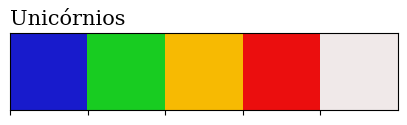

In [ ]:
# Definindo a paleta de cores
paleta = ['#181bcc', '#18cc21', '#f7ba02', '#eb0e0e', '#f0e9e9']
sns.palplot(paleta)
plt.title("Unicórnios", loc='left', fontfamily='serif', fontsize=15,  y=1.0);
plt.show()

In [ ]:
pd.DataFrame( unicornio['Setor'].value_counts() )

,count
Setor,
Fintech,239
Internet software & services,224
E-commerce & direct-to-consumer,103
Health,94
Artificial intelligence,74
"Supply chain, logistics, & delivery",65
Other,65
Cybersecurity,58
Data management & analytics,45


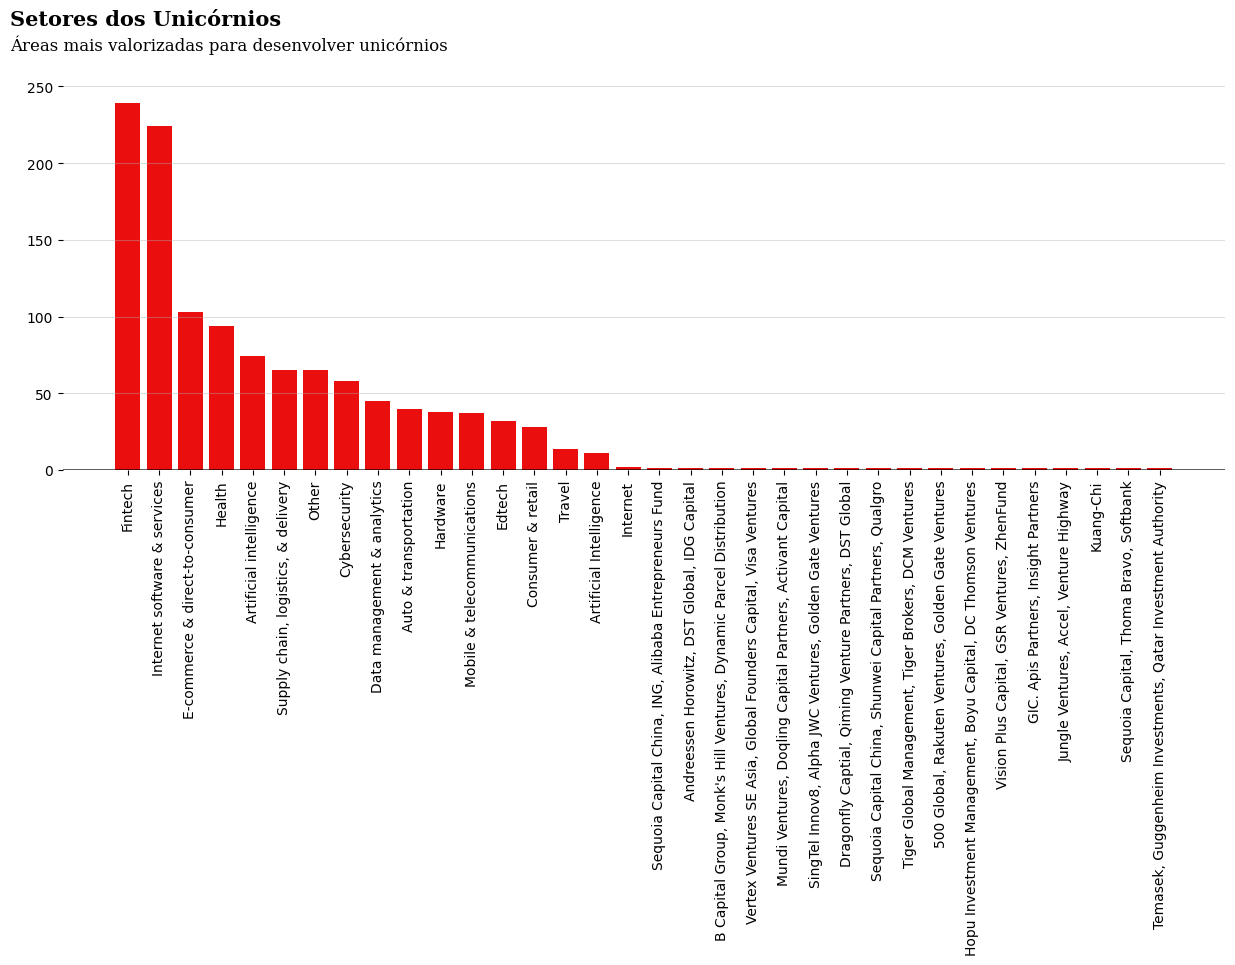

In [ ]:
# Tamanho da Figura
fig, ax = plt.subplots(figsize = (15 , 5))

#Título
fig.text(0.09, 1.0, 'Setores dos Unicórnios', fontsize= 15, fontweight= 'bold', fontfamily= 'serif' );
fig.text(0.09, 0.95, 'Áreas mais valorizadas para desenvolver unicórnios', fontsize= 12, fontweight= 'light', fontfamily= 'serif' );

setor = ax.bar(
        unicornio['Setor'].value_counts().index,
        unicornio['Setor'].value_counts(),
       color= paleta[3] )

ax.tick_params(axis = 'x' , rotation =90)

# Remover todas as spines (bordas)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Configurar GRID apenas no eixo y
ax.grid(axis='y', linestyle= '-', alpha=0.4)

# Linha horizontal no eixo y=0
ax.axhline(y=0, color='black', linewidth=2.0, alpha=0.7)

# Salvar a imagem
plt.savefig('Setores', dpi=500 , bbox_inches= 'tight')

In [ ]:
evolução = ( unicornio['Ano'].value_counts(ascending=True) ).sort_index()
evolução

Ano
2007      1
2011      2
2012      4
2013      3
2014     12
2015     34
2016     21
2017     44
2018     98
2019    102
2020    108
2021    529
2022    228
Name: count, dtype: int64

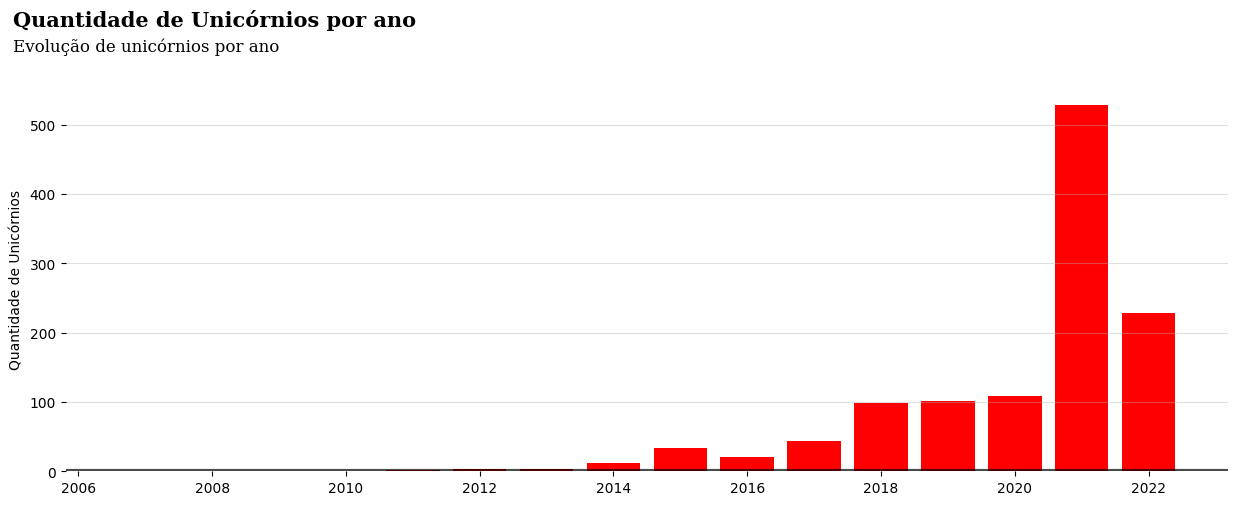

In [ ]:
# Tamanho da Figura
fig, ax = plt.subplots(figsize = (15 , 5))

#Título
fig.text(0.09, 1.0,'Quantidade de Unicórnios por ano ', fontsize= 15, fontweight= 'bold', fontfamily= 'serif' );
fig.text(0.09, 0.95,'Evolução de unicórnios por ano ', fontsize= 12, fontweight= 'light', fontfamily= 'serif' );

crescimento = ax.bar(
       unicornio['Ano'].value_counts().index,
       unicornio['Ano'].value_counts(),
       color= 'red' )

# Remover todas as spines (bordas)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Linha horizontal no eixo y=0
ax.axhline(y=0, color='black', linewidth=3.0, alpha=0.7)

# Configurar GRID apenas no eixo y
ax.grid(axis='y', linestyle= '-', alpha=0.4)

# Adicionar  rótulo ao eixo y
ax.set_ylabel('Quantidade de Unicórnios', size=10)

# Salvar a imagem
plt.savefig('Ano', dpi=500 , bbox_inches= 'tight')